In [1]:
## Prepaid Telecom Datasets

<u> **About Dataset** </u> <br>

Lack of such data on kaggle inspired me to create this dataset as people can use to analyze and evaluate these plans and create necessary visualizations too. <br>
This is cited from the official websites of VI and Airtel.
This is my first dataset so any kind of criticism is welcome

Shares all the unlimited call plans offered by VI and AIrtel as of 16th July 2022 <br>

The features are as follows: <br>
**SIM_COMPANY** : Specifies VI or Airtel  <br>

**OFFER-PRICE(INR)** : Price of the offer  <br>

**VALIDITY(DAYS)** : Plan Validity <br>

**DATA-PER-DAY(GB)** : Internet Data provided on daily basis  <br>

**ADDITIONAL-DATA(GB)** : Data provided as whole with the pack  <br>

**SMS-PER-DAY** : Number of Free SMS on daily basis  <br>

**ADDITIONAL-SMS** : Free SMS included with the pack  <br>

**DISNEY+HOTSTAR(Months)** : Number of months for Free subscription of Disney/Hotstar  <br>

**COST-PER-DAY** : Cost calculation based on plan validity and price offered   <br>

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [3]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [5]:
###!mkdir ~/.kaggle

In [6]:
###!cp /kaggle.json ~/.kaggle/

In [7]:
###!chmod 600 ~/.kaggle/kaggle.json

In [8]:
####! pip install kaggle

In [9]:
###! kaggle datasets download -d abdulaziz04/vi-and-airtel-prepaid-plans-dataset

In [ ]:
###! unzip /content/vi-and-airtel-prepaid-plans-dataset.zip

In [11]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [12]:
# Importing all datasets
vi_airtel_plans = pd.read_csv("/content/VI_AIRTEL_PLANS.csv")
vi_airtel_plans.head(4)

,SIM_COMPANY,OFFER_PRICE,VALIDITY,DATA_PER_DAY,ADDITIONAL DATA,SMS_PER_DAY,ADDITIONAL_SMS,DISNEY+HOTSTAR,COST_PER_DAY
0,AIRTEL,455,84,0.0,6.0,0,900,0,5.42
1,AIRTEL,299,28,2.0,0.0,100,0,0,10.68
2,AIRTEL,479,56,1.5,0.0,100,0,0,8.55
3,AIRTEL,155,24,0.0,1.0,0,300,0,6.46


In [14]:
vi_airtel_plans.dtypes

SIM_COMPANY         object
OFFER_PRICE          int64
VALIDITY             int64
DATA_PER_DAY       float64
ADDITIONAL DATA    float64
SMS_PER_DAY          int64
ADDITIONAL_SMS       int64
DISNEY+HOTSTAR       int64
COST_PER_DAY       float64
dtype: object

In [15]:
vi_airtel_plans.shape

(55, 9)

In [16]:
vi_airtel_plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SIM_COMPANY      55 non-null     object 
 1   OFFER_PRICE      55 non-null     int64  
 2   VALIDITY         55 non-null     int64  
 3   DATA_PER_DAY     55 non-null     float64
 4   ADDITIONAL DATA  55 non-null     float64
 5   SMS_PER_DAY      55 non-null     int64  
 6   ADDITIONAL_SMS   55 non-null     int64  
 7   DISNEY+HOTSTAR   55 non-null     int64  
 8   COST_PER_DAY     55 non-null     float64
dtypes: float64(3), int64(5), object(1)
memory usage: 4.0+ KB


In [17]:
vi_airtel_plans.columns

Index(['SIM_COMPANY', 'OFFER_PRICE', 'VALIDITY', 'DATA_PER_DAY',
       'ADDITIONAL DATA', 'SMS_PER_DAY', 'ADDITIONAL_SMS', 'DISNEY+HOTSTAR',
       'COST_PER_DAY'],
      dtype='object')

In [18]:
vi_airtel_plans["SIM_COMPANY"] = vi_airtel_plans["SIM_COMPANY"].astype("category").cat.codes

In [19]:
vi_airtel_plans.head(3)

,SIM_COMPANY,OFFER_PRICE,VALIDITY,DATA_PER_DAY,ADDITIONAL DATA,SMS_PER_DAY,ADDITIONAL_SMS,DISNEY+HOTSTAR,COST_PER_DAY
0,0,455,84,0.0,6.0,0,900,0,5.42
1,0,299,28,2.0,0.0,100,0,0,10.68
2,0,479,56,1.5,0.0,100,0,0,8.55


In [20]:
vi_airtel_plans["SIM_COMPANY"].value_counts()

1    39
0    16
Name: SIM_COMPANY, dtype: int64

In [21]:
vi_airtel_plans.columns

Index(['SIM_COMPANY', 'OFFER_PRICE', 'VALIDITY', 'DATA_PER_DAY',
       'ADDITIONAL DATA', 'SMS_PER_DAY', 'ADDITIONAL_SMS', 'DISNEY+HOTSTAR',
       'COST_PER_DAY'],
      dtype='object')

In [22]:
X = vi_airtel_plans.drop(['OFFER_PRICE'], axis=1)

In [23]:
Y = vi_airtel_plans["OFFER_PRICE"]

In [24]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X,Y)

ExtraTreesRegressor()

In [25]:
print(model.feature_importances_)

[8.61568030e-05 8.70804305e-01 2.75957752e-02 1.22201590e-02
 2.59117873e-02 1.18250246e-02 1.49170220e-02 3.66397705e-02]


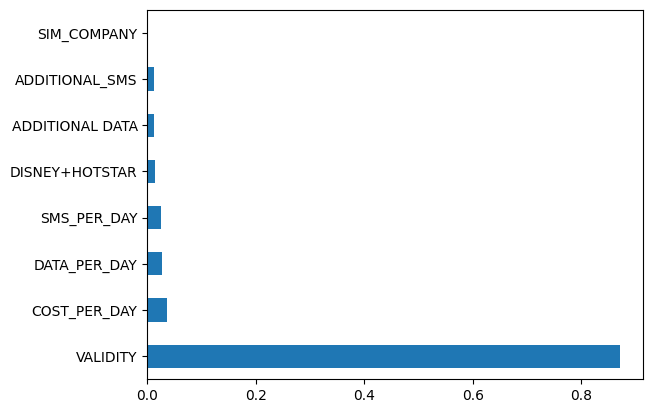

In [26]:
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [27]:
vi_airtel_plans.corr()

,SIM_COMPANY,OFFER_PRICE,VALIDITY,DATA_PER_DAY,ADDITIONAL DATA,SMS_PER_DAY,ADDITIONAL_SMS,DISNEY+HOTSTAR,COST_PER_DAY
SIM_COMPANY,1.000000,0.136162,0.132975,-0.012639,0.082158,-0.073668,0.055370,0.212304,0.075269
OFFER_PRICE,0.136162,1.000000,0.946479,0.249550,0.013719,0.208047,0.221872,0.369923,-0.032547
VALIDITY,0.132975,0.946479,1.000000,0.035517,0.111464,0.009699,0.485600,0.205497,-0.248447
DATA_PER_DAY,-0.012639,0.249550,0.035517,1.000000,-0.424601,0.656389,-0.317188,0.337425,0.764235
ADDITIONAL DATA,0.082158,0.013719,0.111464,-0.424601,1.000000,-0.031143,0.298840,-0.119288,-0.136094
SMS_PER_DAY,-0.073668,0.208047,0.009699,0.656389,-0.031143,1.000000,-0.483231,0.184407,0.624858
ADDITIONAL_SMS,0.055370,0.221872,0.485600,-0.317188,0.298840,-0.483231,1.000000,-0.089111,-0.375466
DISNEY+HOTSTAR,0.212304,0.369923,0.205497,0.337425,-0.119288,0.184407,-0.089111,1.000000,0.502491
COST_PER_DAY,0.075269,-0.032547,-0.248447,0.764235,-0.136094,0.624858,-0.375466,0.502491,1.000000


<Axes: >

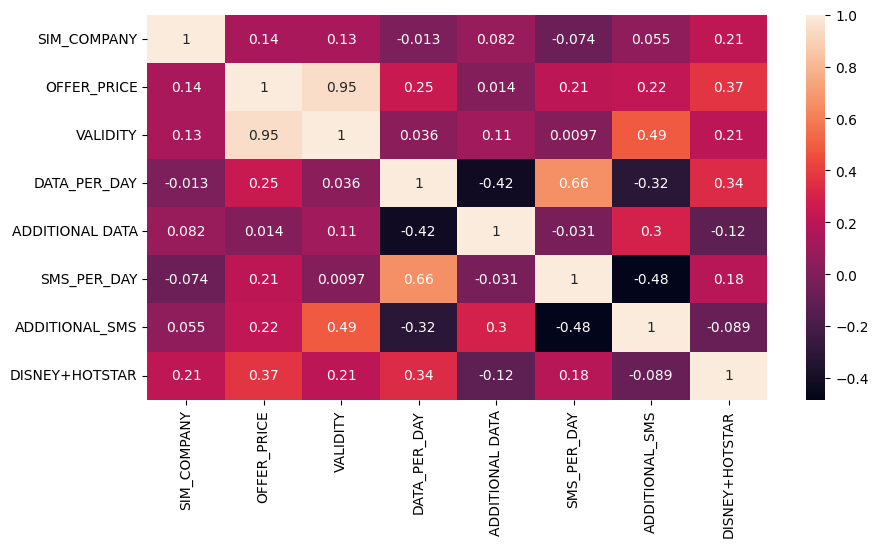

In [28]:
import seaborn as sns
corr=vi_airtel_plans.iloc[:,:-1].corr()
top_features=corr.index
plt.figure(figsize=(10,5))
sns.heatmap(vi_airtel_plans[top_features].corr(),annot=True)


In [29]:
#### Remove The correlated

In [30]:
threshold=0.8

In [31]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [32]:
correlation(vi_airtel_plans.iloc[:,:-1],threshold)

{'VALIDITY'}

In [33]:
X = X.drop(['VALIDITY'], axis=1)

In [34]:
X.shape

(55, 7)

### INFORMATION GAIN

In [35]:
from sklearn.feature_selection import mutual_info_regression

In [36]:
mutual_info=mutual_info_regression(X,Y)

In [37]:
mutual_data=pd.Series(mutual_info,index=X.columns)
mutual_data.sort_values(ascending=False)


COST_PER_DAY       0.559773
DATA_PER_DAY       0.449937
SMS_PER_DAY        0.261368
ADDITIONAL_SMS     0.219533
ADDITIONAL DATA    0.179127
DISNEY+HOTSTAR     0.025779
SIM_COMPANY        0.000000
dtype: float64

In [38]:
X =  X.drop(['SIM_COMPANY'], axis=1)

In [39]:
# columnslitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [40]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(38, 6)
(17, 6)
(38,)
(17,)


In [41]:
## Pipelines Creation
## 1. Data Preprocessing by using Standard Scaler
## 2. Reduce Dimension using PCA
## 3. Apply  Classifier

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [43]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('lin_regressor',LinearRegression())])

In [44]:
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('dt_regressor',DecisionTreeRegressor())])

In [45]:
pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=5)),
                     ('rf_classifier',RandomForestRegressor())])

In [46]:
pipeline_xgbregressor=Pipeline([('scalar3',StandardScaler()),
                     ('pca3',PCA(n_components=5)),
                     ('rf_classifier',XGBRegressor())])

In [47]:
## LEts make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_xgbregressor]

In [48]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [49]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'RandomForest', 3: 'XGBRegressor'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, Y_train)

In [50]:
for i,model in enumerate(pipelines):
    print("{} Test Accuracy: {}".format(pipe_dict[i],model.score(X_test,Y_test)))

Logistic Regression Test Accuracy: -0.4561916257277665
Decision Tree Test Accuracy: -0.9278459071578158
RandomForest Test Accuracy: -0.2747418384630762
XGBRegressor Test Accuracy: -0.028427853192655617


In [51]:
xgb_regressor=XGBRegressor(random_state=0).fit(X_train,Y_train)
prediction=xgb_regressor.predict(X_test)

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
print("Mean Squarred Error : ",mean_squared_error(Y_test,prediction))
print("Mean Absolute Error : ",mean_absolute_error(Y_test,prediction))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(Y_test,prediction))

Mean Squarred Error :  124489.21692058578
Mean Absolute Error :  160.24459120806526
Mean Absolute Percentage Error :  0.340474664135147


In [53]:
print("R2 Score : ",r2_score(Y_test,prediction))

R2 Score :  0.10214769286962355


In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import time

## Randomized Search CV

In [56]:
# A parameter grid for XGBoost
params = {
    'n_estimators':[500],
    'min_child_weight':[4,5],
    'gamma':[i/10.0 for i in range(3,6)],
    'subsample':[i/10.0 for i in range(6,11)],
    'colsample_bytree':[i/10.0 for i in range(6,11)],
    'max_depth': [2,3,4,6,7],
    'objective': ['reg:squarederror', 'reg:tweedie'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['rmse'],
    'eta': [i/10.0 for i in range(3,6)],
}

reg = XGBRegressor(nthread=-1)

# run randomized search
n_iter_search = 500
random_search = RandomizedSearchCV(reg, param_distributions=params,
                                   n_iter=n_iter_search, cv=9, scoring='neg_mean_squared_error')

start = time.time()
random_search.fit(X_train, Y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))

Streaming output truncated to the last 5000 lines.

[17:48:51] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:48:51] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:48:51] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:48:51] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:48:51] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:48:51] WARNING: ../src/learner.cc:767: 
Parameters: { "colsample_bytree", "gamma", "max_depth", "min_child_weight", "subsample" } are not used.

[17:48:51] WARNING: ../src/learner.cc:767: 
Parameters

In [57]:
best_regressor = random_search.best_estimator_

In [58]:
print(best_regressor)

XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eta=0.5, eval_metric='rmse',
             feature_types=None, gamma=0.5, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             nthread=-1, num_parallel_tree=None, ...)


In [59]:
y_pred_rmse=best_regressor.predict(X_test)

In [60]:
y_pred_rmse[:10]

array([176.53297, 802.28906, 458.02164, 458.02164, 275.22815, 346.73532,
       430.7942 , 519.7985 , 500.438  , 561.88245], dtype=float32)

In [61]:
print("Mean Squarred Error : ",mean_squared_error(Y_test,y_pred_rmse))
print("Mean Absolute Error : ",mean_absolute_error(Y_test,y_pred_rmse))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(Y_test,y_pred_rmse))

Mean Squarred Error :  1940808.1379003136
Mean Absolute Error :  500.1948592242073
Mean Absolute Percentage Error :  0.7235975106857594


In [62]:
print("R2 Score : ",r2_score(Y_test,y_pred_rmse))

R2 Score :  -12.997670701252948


In [63]:
random_search.best_params_

{'subsample': 1.0,
 'objective': 'reg:tweedie',
 'n_estimators': 500,
 'min_child_weight': 5,
 'max_depth': 6,
 'gamma': 0.5,
 'eval_metric': 'rmse',
 'eta': 0.5,
 'colsample_bytree': 0.7,
 'booster': 'gblinear'}

In [64]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'min_child_weight': [random_search.best_params_['min_child_weight']],
    'n_estimators': [random_search.best_params_['n_estimators'],
                     random_search.best_params_['n_estimators']+200,
                     random_search.best_params_['n_estimators']+300,
                     random_search.best_params_['n_estimators']+400,
                     random_search.best_params_['n_estimators']+500],
    'max_depth': [random_search.best_params_['max_depth'],
                         random_search.best_params_['max_depth']+2,
                         random_search.best_params_['max_depth'] + 4,
                         random_search.best_params_['max_depth'] + 8,
                         random_search.best_params_['max_depth'] + 12],
    'min_child_weight': [random_search.best_params_['min_child_weight'] - 2,
                          random_search.best_params_['min_child_weight'] - 1,
                          random_search.best_params_['min_child_weight'],
                          random_search.best_params_['min_child_weight'] + 1,
                          random_search.best_params_['min_child_weight'] + 2]
}

print(param_grid)

{'min_child_weight': [3, 4, 5, 6, 7], 'n_estimators': [500, 700, 800, 900, 1000], 'max_depth': [6, 8, 10, 14, 18]}


In [65]:
#### Fit the grid_search to the data
xgb=XGBRegressor()
grid_search=GridSearchCV(estimator=xgb,param_grid=param_grid,cv=10,n_jobs=-1,verbose=2)
grid_search.fit(X_train,Y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None,...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 14, 18],
                         'min_child_weight': [3, 4, 5, 6, 7],
                         'n_estimators': [500, 700, 800, 900, 1000]},
             verbose=2)

In [66]:
grid_search.best_estimator_

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [67]:
best_grid=grid_search.best_estimator_

In [68]:
best_grid.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [69]:
y_pred_grid = best_grid.predict(X_test)

In [70]:
y_pred_grid[:10]

array([ 900.4427  ,  666.03705 ,  209.0006  ,  209.0006  ,  337.0012  ,
         52.109844,  458.8447  ,  -35.850918,  -35.850918, 1089.7617  ],
      dtype=float32)

In [71]:
print("Mean Squarred Error : ",mean_squared_error(Y_test,y_pred_grid))
print("Mean Absolute Error : ",mean_absolute_error(Y_test,y_pred_grid))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(Y_test,y_pred_grid))

Mean Squarred Error :  176466.2675812582
Mean Absolute Error :  230.1328737595502
Mean Absolute Percentage Error :  0.6066290022471118


## Optuna

In [72]:
###! pip install optuna

In [73]:
###! pip install xgboost

In [74]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import optuna


In [75]:
def objective(trial):
    params = {
        "objective": "reg:tweedie",
        "n_estimators": trial.suggest_int("n_estimators", 1000, 2000),
        "verbosity": 0,
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.1, log=True),
        "max_depth": trial.suggest_int("max_depth", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.05, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.05, 1.0),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 100),
    }

    model = xgb.XGBRegressor(**params)
    model.fit(X_train, Y_train, verbose=False)
    predictions_optuna = model.predict(X_test)
    rmse = mean_squared_error(Y_test, predictions_optuna, squared=False)
    return rmse

In [76]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=300)

[I 2023-07-30 17:59:20,844] A new study created in memory with name: no-name-8c4354a8-2c49-42c9-9da7-5372027b85be
[I 2023-07-30 17:59:25,175] Trial 0 finished with value: 405.74356557837467 and parameters: {'n_estimators': 1443, 'learning_rate': 0.009171764745576105, 'max_depth': 1, 'subsample': 0.6954989084756878, 'colsample_bytree': 0.8896402814947262, 'min_child_weight': 10}. Best is trial 0 with value: 405.74356557837467.
[I 2023-07-30 17:59:25,970] Trial 1 finished with value: 357.5882093035161 and parameters: {'n_estimators': 1549, 'learning_rate': 0.09789955825359699, 'max_depth': 2, 'subsample': 0.17940547429715975, 'colsample_bytree': 0.5955090883628169, 'min_child_weight': 96}. Best is trial 1 with value: 357.5882093035161.
[I 2023-07-30 17:59:26,884] Trial 2 finished with value: 379.18410083314194 and parameters: {'n_estimators': 1332, 'learning_rate': 0.09884025087265293, 'max_depth': 7, 'subsample': 0.12282973113612257, 'colsample_bytree': 0.316227623044237, 'min_child_wei

In [77]:
print('Best hyperparameters:', study.best_params)
print('Best RMSE:', study.best_value)

Best hyperparameters: {'n_estimators': 1792, 'learning_rate': 0.0979511214309094, 'max_depth': 1, 'subsample': 0.07882167899833753, 'colsample_bytree': 0.6931231677868107, 'min_child_weight': 4}
Best RMSE: 85.46594064602196


In [78]:
xgboost_regressor = xgb.XGBRegressor(**study.best_params)

In [79]:
xgboost_regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6931231677868107, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.0979511214309094,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=1, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             n_estimators=1792, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [80]:
y_pred_xgboost = xgboost_regressor.predict(X_test)

In [81]:
y_pred_xgboost[:10]

array([734.009  , 612.48126, 569.92236, 569.92236, 560.4196 , 579.4037 ,
       593.6781 , 521.59454, 521.59454, 593.6781 ], dtype=float32)

In [82]:
print("Mean Squarred Error : ",mean_squared_error(Y_test,y_pred_xgboost))
print("Mean Absolute Error : ",mean_absolute_error(Y_test,y_pred_xgboost))
print("Mean Absolute Percentage Error : ",mean_absolute_percentage_error(Y_test,y_pred_xgboost))

Mean Squarred Error :  151234.14036592183
Mean Absolute Error :  293.1332648782169
Mean Absolute Percentage Error :  0.8336880538827112


In [83]:
print("R2 Score : ",r2_score(Y_test,y_pred_xgboost))

R2 Score :  -0.0907444452079953


In [84]:
y_pred_xgboost[:10]

array([734.009  , 612.48126, 569.92236, 569.92236, 560.4196 , 579.4037 ,
       593.6781 , 521.59454, 521.59454, 593.6781 ], dtype=float32)

In [85]:
X_test.columns

Index(['DATA_PER_DAY', 'ADDITIONAL DATA', 'SMS_PER_DAY', 'ADDITIONAL_SMS',
       'DISNEY+HOTSTAR', 'COST_PER_DAY'],
      dtype='object')

In [86]:
y_pred_xgboost = pd.DataFrame(y_pred_xgboost)

In [88]:
y_pred_xgboost.rename(columns = { 0 : "PREDICT"}, inplace=True)

In [93]:
frames = [y_pred_xgboost, X_test]

In [96]:
res1 = pd.concat([y_pred_xgboost, X_test], axis=1, join='inner')

In [97]:
res1.head(2)

,PREDICT,DATA_PER_DAY,ADDITIONAL DATA,SMS_PER_DAY,ADDITIONAL_SMS,DISNEY+HOTSTAR,COST_PER_DAY
0,734.008972,0.0,6.0,0,900,0,5.42
5,579.403687,1.5,0.0,100,0,0,8.56


In [98]:
res1.to_csv("Predict_Price.csv")